## Stochastic Value of Innovation Tutorial
#### Capabilities

In [1]:
import os
from parameter_sweep.loop_tool.loop_tool import loopTool, get_working_dir
from watertap.core.solvers import get_solver
from pyomo.environ import (
    check_optimal_termination,
)
import example_flowsheet as RO

## Create a function to setup your sweep
### This function needs to build the flowsheet, initialize, set operating conditions, and open DOFs for optimization if desired

In [2]:
def build_sweep(
        inlet_flow_rate=100,
        inlet_concentration=35,
        inlet_pressure=50e5,
        membrane_area=10000,
):
    m = RO.build_system()
    RO.set_operating_conditions(m, Qin=inlet_flow_rate, Cin=inlet_concentration)
    RO.set_ro_system_operating_conditions(m, mem_area=membrane_area, RO_pressure=inlet_pressure)
    RO.set_scaling(m)
    RO.init_system(m)
    RO.add_costing(m)
    RO.solve(m)
    RO.report_RO(m)
    RO.optimize(
        m,
        water_recovery=0.5,
    )

    return m

def solve(model, solver=None, tee=True, raise_on_failure=True):
    # ---solving---
    if solver is None:
        solver = get_solver()

    print("\n--------- SOLVING ---------\n")

    results = solver.solve(model, tee=tee)

    if check_optimal_termination(results):
        print("\n--------- OPTIMAL SOLVE!!! ---------\n")
        return results
    msg = (
        "The current configuration is infeasible. Please adjust the decision variables."
    )
    if raise_on_failure:
        raise RuntimeError(msg)
    else:
        return results

In [3]:
cwd = get_working_dir()
yaml_file = os.path.join(cwd, 'diff_param_sweep.yaml')
save_name = 'sweep'
save_dir = os.path.join(get_working_dir(), 'sweep')

print(yaml_file)
print(save_dir)

/Users/zbinger/watertap/tutorials/SVOI/diff_param_sweep.yaml
/Users/zbinger/watertap/tutorials/SVOI/sweep


## Explain YAML File Here

![Image](resources/yaml_image.png)

In [4]:
solver = get_solver()
solver.options["max_iter"] = 3000

# lT = loopTool(
#         yaml_file,
#         build_function=build_sweep,
#         optimize_function=solve,
#         solver=solver,
#         save_name=save_name,
#         saving_dir=save_dir,
#         execute_simulations=True,
#         number_of_subprocesses=1,
#     )

In [5]:
# Load results file
results_file = os.path.join(save_dir, "output", "sweep_analysisType_example_diff_analysis.h5")

In [6]:
from psPlotKit.data_manager.ps_data_manager import psDataManager

In [7]:
data_manager = psDataManager(
            results_file
        )

psDataImport 14:34:14 INFO: data import v0.2
psDataImport 14:34:14 INFO: Importing file /Users/zbinger/watertap/tutorials/SVOI/sweep/output/sweep_analysisType_example_diff_analysis.h5
psDataImport 14:34:14 INFO: Getting directories
psDataImport 14:34:14 INFO: global unique directory keys: [('example_diff_analysis', np.str_('Salt Permeability')), ('example_diff_analysis', np.str_('Water Permeability'))]
psDataImport 14:34:14 INFO: example_diff_analysis/Salt Permeability contains unique directory [('example_diff_analysis', np.str_('Salt Permeability'))]
psDataImport 14:34:14 INFO: example_diff_analysis/Water Permeability contains unique directory [('example_diff_analysis', np.str_('Water Permeability'))]
psDataImport 14:34:14 INFO: Found directory: example_diff_analysis/Salt Permeability
psDataImport 14:34:14 INFO: Found directory: example_diff_analysis/Water Permeability
psDataImport 14:34:14 INFO: Getting directory contents for example_diff_analysis/Salt Permeability
psDataImport 14:34

# Describe data here
![Image](resources/data_idxs.png)

In [8]:
VOI = data_manager.get_voi(yaml_file)
VOI

psDataImport 14:34:14 INFO: User did not provide data key list, importing ALL data!
psDataImport 14:34:14 INFO: User selected example_diff_analysis/Water Permeability
psDataImport 14:34:15 INFO: Done importing data in 0.44762110710144043 seconds!
psDataImport 14:34:15 INFO: User did not provide data key list, importing ALL data!
psDataImport 14:34:15 INFO: User selected example_diff_analysis/Water Permeability
psDataImport 14:34:15 INFO: Done importing data in 0.46283578872680664 seconds!
psDataImport 14:34:15 INFO: User did not provide data key list, importing ALL data!
psDataImport 14:34:15 INFO: User selected example_diff_analysis/Salt Permeability
psDataImport 14:34:16 INFO: Done importing data in 0.5507183074951172 seconds!
psDataImport 14:34:16 INFO: User did not provide data key list, importing ALL data!
psDataImport 14:34:16 INFO: User selected example_diff_analysis/Salt Permeability
psDataImport 14:34:16 INFO: Done importing data in 0.4717118740081787 seconds!


{'Water Permeability': {'fs.costing.LCOW': array([0.09443902, 0.12493324, 0.11561907, 0.18668978, 0.0657099 , 0.11012003]),
  'fs.ro.A_comp[0.0,H2O]': array([0.95505939, 1.26324726, 1.20374858, 1.94297288, 0.78115893, 1.30876405]),
  'VOI': array([0.09888288, 0.09889849, 0.09604918, 0.0960846 , 0.08411848, 0.08414048])},
 'Salt Permeability': {'fs.costing.LCOW': array([-0.02552852, -0.02029706, -0.04678876, -0.03036247, -0.04857212, -0.03359057]),
  'fs.ro.B_comp[0.0,NaCl]': array([-1.02922522, -0.81717413, -1.96387175, -1.2685835 , -2.19585885, -1.5116544 ]),
  'VOI': array([0.02480363, 0.02483811, 0.02382476, 0.02393415, 0.02211987, 0.02222106])}}

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
frames = [pd.DataFrame({'VOI': VOI[key]['VOI'], 'Sweep': key}) for key in VOI.keys()]
df = pd.concat(frames, ignore_index=True)

In [17]:
df

,VOI,Sweep
0,0.111828,Water Permeability
1,0.111864,Water Permeability
2,0.071542,Water Permeability
3,0.071567,Water Permeability
4,0.061145,Water Permeability
5,0.061162,Water Permeability
6,0.021417,Salt Permeability
7,0.021461,Salt Permeability
8,0.024331,Salt Permeability
9,0.024365,Salt Permeability


/var/folders/f6/ln_247ms54b5y1mdczhdrr59rtfn88/T/ipykernel_78276/4116949114.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(


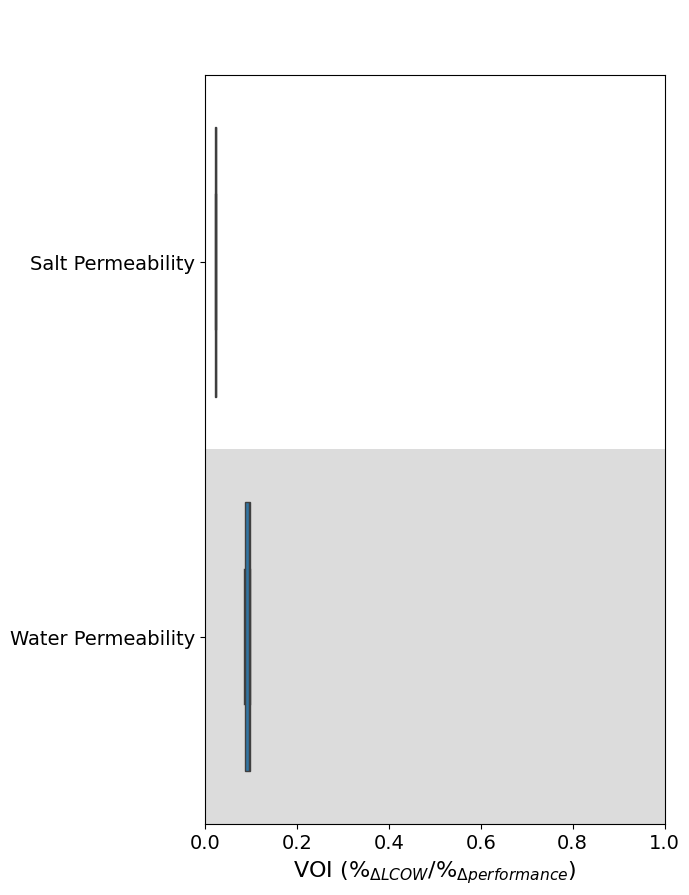

In [11]:
def plot_voi(df):
    fig, ax = plt.subplots(figsize=(7,9))
    sns.boxplot(
        df,
        x='VOI',
        y='Sweep',
        gap=0.1,
        fliersize=0,

    )   

    ax.set_xlim(0, 1)
    ax.set_ylim(-0.5, len(df['Sweep'].unique())-0.5)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.set_ylabel('')
    ax.set_xlabel("VOI (%$_{\Delta LCOW}$/%$_{\Delta performance}$)", fontsize=16)
    color_bands = ["#d1d1d1", "white"]
    for i in range(0, len(ax.get_yticks())):
        ax.axhspan(i - 0.5, i + 0.5, facecolor=color_bands[i%2], alpha=0.75)

    plt.legend(
        bbox_to_anchor=(-0.3, 1.1), 
        loc='upper left',
        ncol=len(df['Sweep'].unique()), 
        frameon=False, 
        fontsize=14,
        alignment='left',
        handlelength=1, 
        handleheight=1)

    plt.tight_layout()

plot_voi(df)

In [12]:
yaml_file = os.path.join(cwd, 'diff_param_sweep_full.yaml')

# lT = loopTool(
#         yaml_file,
#         build_function=build_sweep,
#         optimize_function=solve,
#         solver=solver,
#         save_name=save_name,
#         saving_dir=save_dir,
#         execute_simulations=True,
#         number_of_subprocesses=1, # For some reason my cpu is not working > 1
#     )

# Load results file
results_file = os.path.join(save_dir, "output", "sweep_analysisType_example_diff_analysis_full.h5")

In [15]:
data_manager = psDataManager(
            results_file
        )
VOI = data_manager.get_voi(yaml_file)
frames = [pd.DataFrame({'VOI': VOI[key]['VOI'], 'Sweep': key}) for key in VOI.keys()]
df = pd.concat(frames, ignore_index=True)

psDataImport 14:35:32 INFO: data import v0.2
psDataImport 14:35:32 INFO: Importing file /Users/zbinger/watertap/tutorials/SVOI/sweep/output/sweep_analysisType_example_diff_analysis_full.h5
psDataImport 14:35:32 INFO: Getting directories
psDataImport 14:35:32 INFO: global unique directory keys: [('example_diff_analysis_full', np.str_('Membrane Cost')), ('example_diff_analysis_full', np.str_('Pump Cost')), ('example_diff_analysis_full', np.str_('Pump Efficiency')), ('example_diff_analysis_full', np.str_('Salt Permeability')), ('example_diff_analysis_full', np.str_('Water Permeability'))]
psDataImport 14:35:32 INFO: example_diff_analysis_full/Membrane Cost contains unique directory [('example_diff_analysis_full', np.str_('Membrane Cost'))]
psDataImport 14:35:32 INFO: example_diff_analysis_full/Pump Cost contains unique directory [('example_diff_analysis_full', np.str_('Pump Cost'))]
psDataImport 14:35:32 INFO: example_diff_analysis_full/Pump Efficiency contains unique directory [('example

/var/folders/f6/ln_247ms54b5y1mdczhdrr59rtfn88/T/ipykernel_78276/4116949114.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(


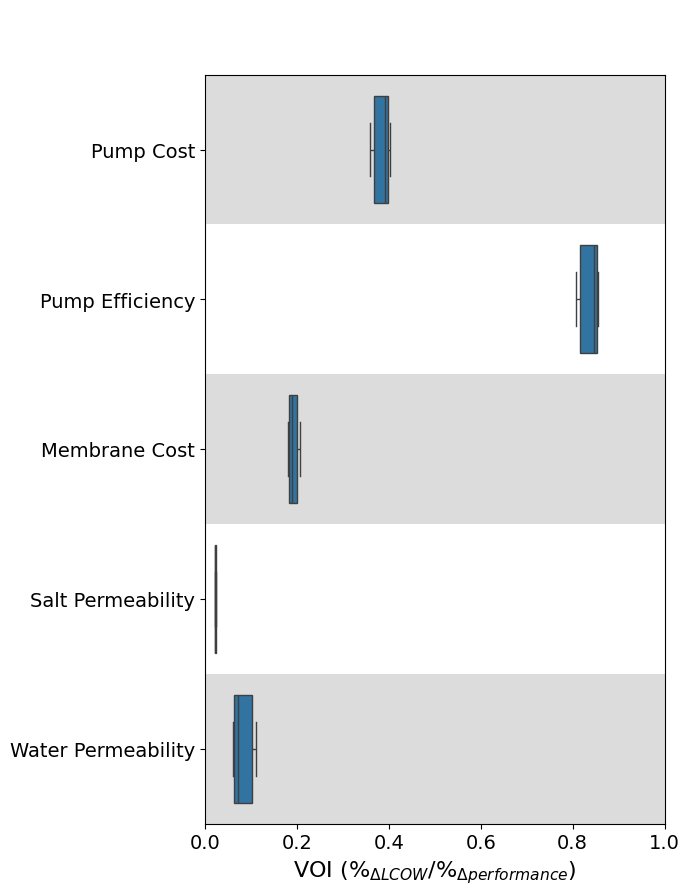

In [16]:
plot_voi(df)

# Interpreting Results
![Image](resources/voi_explain.png)